<a href="https://colab.research.google.com/github/yoobyoungcheol/AIstudy24/blob/master/date%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

올바른 결과를 도출하기 위해선 데이터를 사용하기 전에 데이터 전처리 과정을 거친다. 전처리 과정을 거친 데이터로 훈련했을 때와 그게 아닐 때의 차이를 알고 표준점수로 특성의 스케일변환을 해보자

만약 길이가 25cm이고 무게가 150g이면 도미인데 빙어로 결론이 나왔다

In [1]:
# 도미와 빙어 데이터 49개    앞 35개는 도미 (1)   뒤 14개는 빙어 (0)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np
np.column_stack(([1,2,3,],[4,5,6]))   # .column(열) stack(쌓는다)   스텍을 쌓는다

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
fish_date = np.column_stack((fish_length,fish_weight))
# fish_date 변수에 2차원 배열을 넣는다. (길이,무게)
print(fish_date[:5])             # 재대로 만들어 졌는지 확인한다 (5개 미리보기)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [4]:
# 정답파일을 생성한다
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [5]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))     # 1차원 배열 (1)이 35개이고, (0)이 14개인 1차원배열
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_date,fish_target,stratify=fish_target, random_state=42)
print(train_input.shape,test_input.shape)

# train_input 훈련용 입력값
# train_target 훈련용 정답
# test_input 테스트용 입력값
# test_target 테스트용 정답
# stratify : 타겟값을 넣어줌 (target의 class 비율을 유지한채 스플릿해줌)
# random_state : 시드값을 424로 지정하고 랜덤적용 (수업용) (생략가능)

(36, 2) (13, 2)


In [10]:
print(train_target.shape,test_target.shape)              # 결과가 튜플로 나옴

(36,) (13,)


In [11]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
from sklearn.neighbors import KNeighborsClassifier   # k~이웃 근접 알고리즘

kn = KNeighborsClassifier()
kn.fit(train_input,train_target)      # 훈련시작 (훈련용입력, 훈련용정답)

KNeighborsClassifier()

In [14]:
kn.score(test_input,test_target)       # 테스트시작 (테스트용입력, 테스트용정답)

1.0

In [15]:
kn.predict([[25,150]])                 # 도미 25cm,150g 처리결과 0(빙어)가 나옴 ERROR

array([0.])

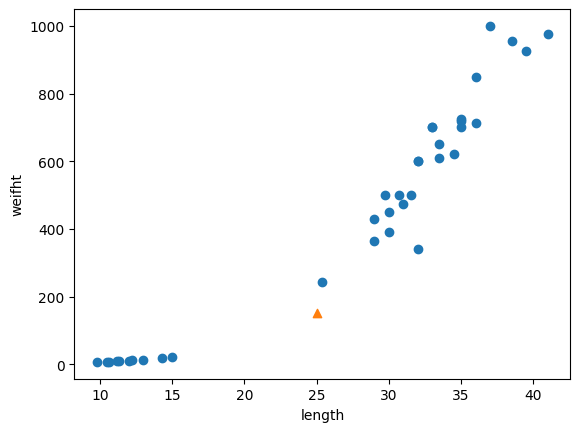

In [16]:
# 그래프로 직접 확인하기

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])    # 훈령용 자료 차트에 입력
plt.scatter(25,150, marker="^")                   # 내가 알고 싶은 자료        marker는 여러가지가 가능하다 참고 URL : https://pyvisuall.tistory.com/39
plt.xlabel("length")
plt.ylabel("weifht")
plt.show()

In [ ]:
# X축은 40 Y축은 1000     X,Y축의 비율이 다르기에 정확한 그래프로 판단할수 없다
# k~근접 이웃 알고리즘은 주변에 있는 5개를 거리로 판단하기때문에 좀더 알아볼 필요가 있다.

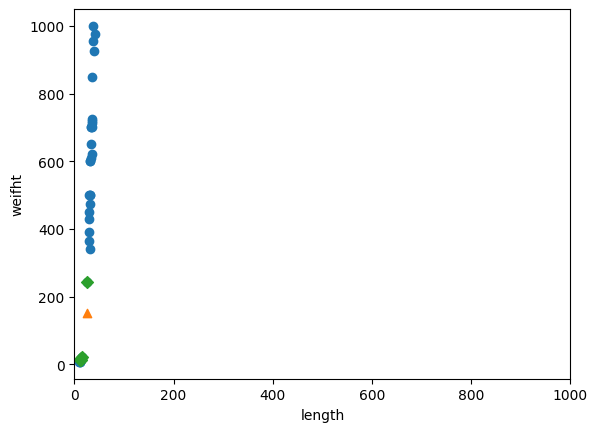

In [22]:
distances, indexes = kn.kneighbors([[25,150]])  # 내가 알고싶은 값의 거리와 인덱스를 알아보기

plt.scatter(train_input[:,0],train_input[:,1])   # 훈령용 자료 차트에 입력
plt.scatter(25,150, marker="^")                  # 내가 알고 싶은 값
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')      # k~이웃 근접 알고리즘이 판단하는 이웃의 값
plt.xlim(0,1000)                  # x축의 범위를 0~1000으로 y축과 같이 지정해줌
plt.xlabel("length")
plt.ylabel("weifht")
plt.show()                 # 결론 : 녹색으로 25,150에 대한 이웃이 누구인지 파악이 가능하다.

In [23]:
print(train_input[indexes])    # k~이웃 근접 알고리즘이 판단하는 이웃의 값

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [24]:
print(train_target[indexes])   # k~이웃 근접 알고리즘이 판단하는 이웃의 값 의 결과 값
# 도미(1), 빙어(4)로 빙어가 더많이 존재한다 고로  25cm,150g의 도미를 빙어로 판단했다고 확인

[[1. 0. 0. 0. 0.]]


In [25]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [26]:
# 평균 구해보기   ( 가장 널리 사용되는 전처리 방법은 : 표준점수(z점수) 구하기 )
# 표준점수는 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져 있는지를 나타낸다
# 분차는 데이터에서 평균을 뺸 값을 모두 제외한 다음 평균을 내어 구함
# 표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다.
# 표준점수는 각 데이터가 우너점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값

mean = np.mean(train_input, axis=0)   # 평균을 구한다  axis : 중심선
std = np.std(train_input, axis=0)     # 표준편차를 구한다.
# train_input -> 36개의 요소와 2개의 특성을 가짐 (36,2) 크기의 배열
# 행을 따라 각 열의 통계값을 계산함
print(mean, std)


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [29]:
# 궁금증 테스틑 코드
mean2 = np.mean(train_input, axis=1)
std2 = np.std(train_input, axis=1)
print(mean2,std2)

[264.85  12.2  366.5   10.   482.25 229.5  375.   443.   253.   377.5
 518.5   10.5  327.25  10.9  196.   366.5  265.35 496.75 341.75  17.
 265.75 133.7    8.25 316.     9.   321.75   8.8  367.5  316.   380.
  12.6  240.   186.    17.45 210.   508.  ] [2.3515e+02 0.0000e+00 3.3350e+02 1.3000e+00 4.4275e+02 2.0050e+02
 3.3900e+02 4.0700e+02 2.2200e+02 3.4250e+02 4.8150e+02 7.0000e-01
 2.9275e+02 1.1000e+00 1.6700e+02 3.3350e+02 2.3465e+02 4.5825e+02
 3.0825e+02 2.7000e+00 2.3425e+02 1.0830e+02 1.5500e+00 2.8400e+02
 1.5000e+00 2.8825e+02 1.8000e+00 3.3250e+02 2.8400e+02 3.4500e+02
 4.0000e-01 2.1000e+02 1.5400e+02 2.4500e+00 1.8000e+02 4.6700e+02]


In [31]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수 반환하기

train_scaled = (train_input - mean) / std            # 표준점수 공식 (암기필수)
# 원본 데이터에서 평균을 빼고 표준편차로 나누어줌
# numpy는 train_imput의 모든 행에서 mean에 있는 두 평균값을 빼줌
# std에 있는 두 표준 편차를 다시 모든 행에 적용한다.
# 위 기법을 [브로드캐스팅] 이라 한다.

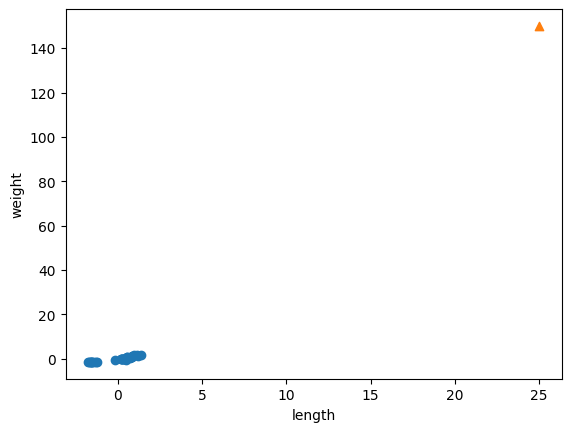

In [32]:
# 전처리 데이터를 이용해서 모델 훈련시키기

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()                  # 내가 알고자하는 값은 표준점수공식이 적용이 되어있지않아서 이상한 표가 생김
# 전처리된 데이터는 표준점수를 위해서 값이 축소되어 있는데
# 알고자하는 값은 표준점수화가 안되어 있어서 그러하다
# 훈련세트를 평균으로 뺴고 표준편차로 나누어 주었기 때문에 값의 범위가 달라짐

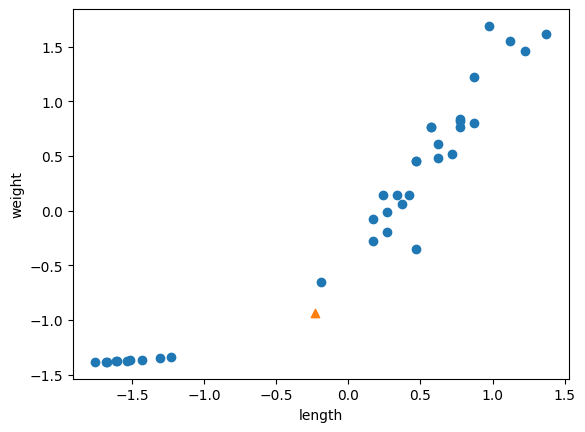

In [33]:
new = ([25,150]-mean) / std    # 내가 알고자 하는 값의 표준점수화

# 위에 그래프 그리기에서 내가 알고자하는 값의 수정본
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1], marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

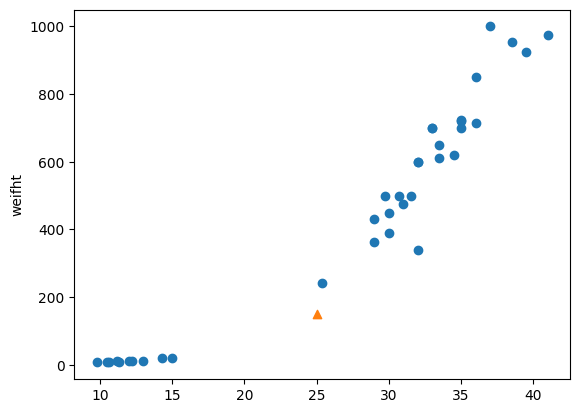

In [34]:
# 표준점수를 얻기전 원래의 그래프(비교차원)
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker="^")
plt.xlabel("length")
plt.ylabel("weifht")
plt.show()

In [35]:
# 훈련 시작!!

kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [37]:
# 표준 점수화
test_scaled = (test_input - mean) / std
# 데스트 진행
kn.score(test_scaled,test_target)

1.0

In [39]:
print(kn.predict([new]))   # 재대로 도미라고 출력을 리턴함

[1.]


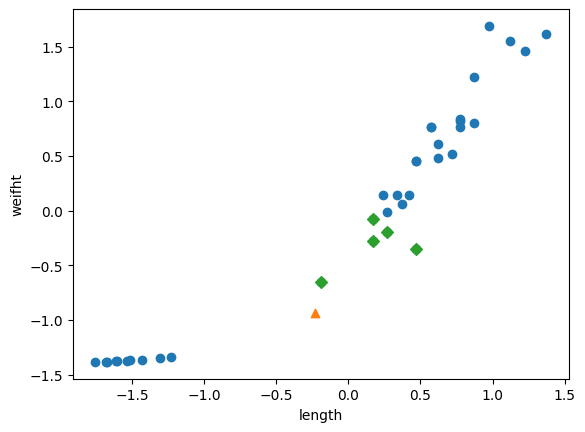

In [41]:
# 산점도 그리기

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker="D")
plt.xlabel("length")
plt.ylabel("weifht")
plt.show()